**NAME: IBRAHIM AHMED**<br/><br/>
**TASK#02 Unemployment Analysis**

**Importing libraries**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cd
import datetime as dt
import folium
import plotly.express as px
import nbformat

In [27]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [28]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [30]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [31]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [32]:
# df = df.rename(columns={"Region":"State"})
# df = df.rename(columns={"Region.1":"Region"})


In [33]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\ebrah\AppData\Local\Temp\ipykernel_10372\150256929.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [35]:
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [36]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [37]:
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Month'].apply(lambda x : cd.month_abbr[x])
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    category      
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    category      
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   Month                                267 non-null    int32         
 10  Month_Name    

**Boxplot for estimated unemployment rates according to states**

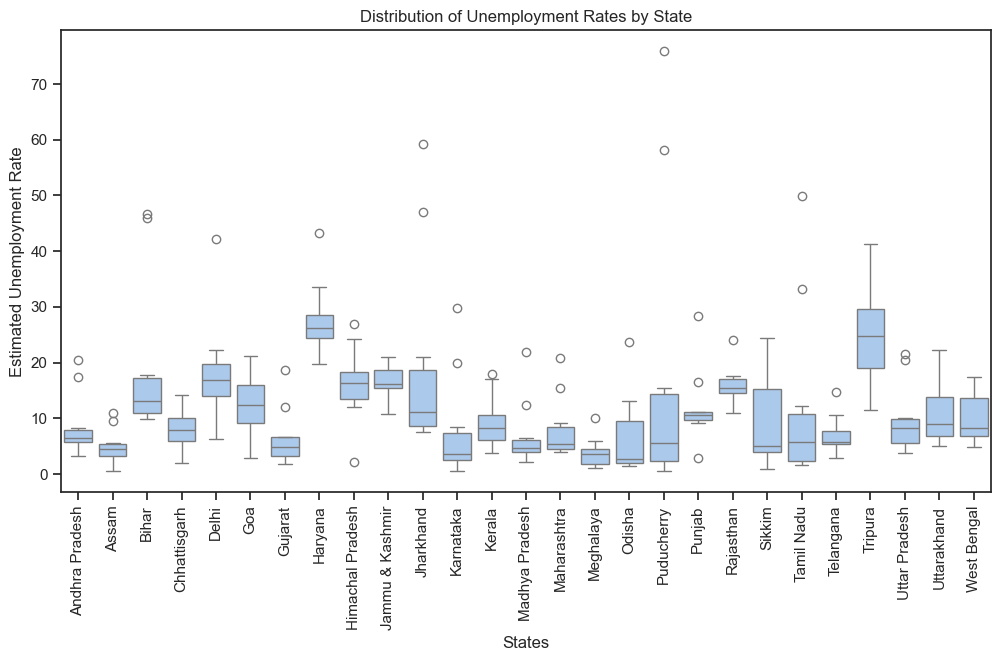

In [39]:
plt.figure(figsize=(12, 6))
# Distribution of unemployment rates by state
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='States', y='Estimated Unemployment Rate', data=df)
plt.title('Distribution of Unemployment Rates by State')
plt.xticks(rotation=90)
plt.show()



**Boxplot for unemployment rate according to regions**

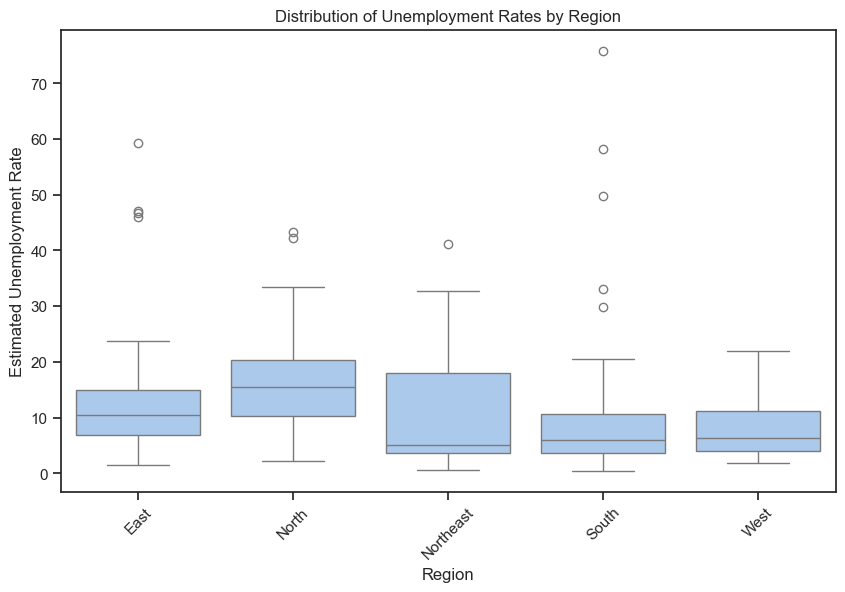

In [40]:
# Distribution of unemployment rates by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.title('Distribution of Unemployment Rates by Region')
plt.xticks(rotation=45)
plt.show()

**Barplot for unemployment rate percentage according to states**

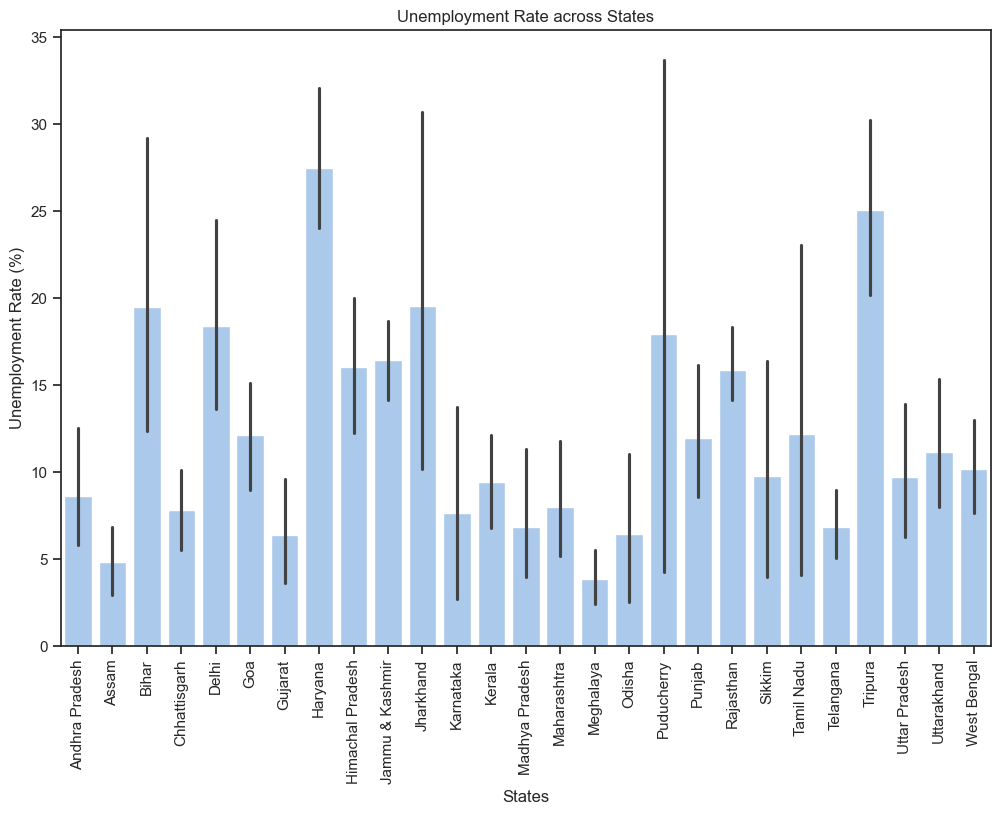

In [41]:
# Assuming df is your DataFrame with columns 'States', 'Estimated Unemployment Rate (%)', 'Estimated Employed', and 'Estimated Labor Participation Rate (%)'
plt.figure(figsize=(12, 8))
sns.barplot(x='States', y='Estimated Unemployment Rate', data=df)
plt.xlabel('States')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate across States')
plt.xticks(rotation=90)
plt.show()

**Correlation matrix**

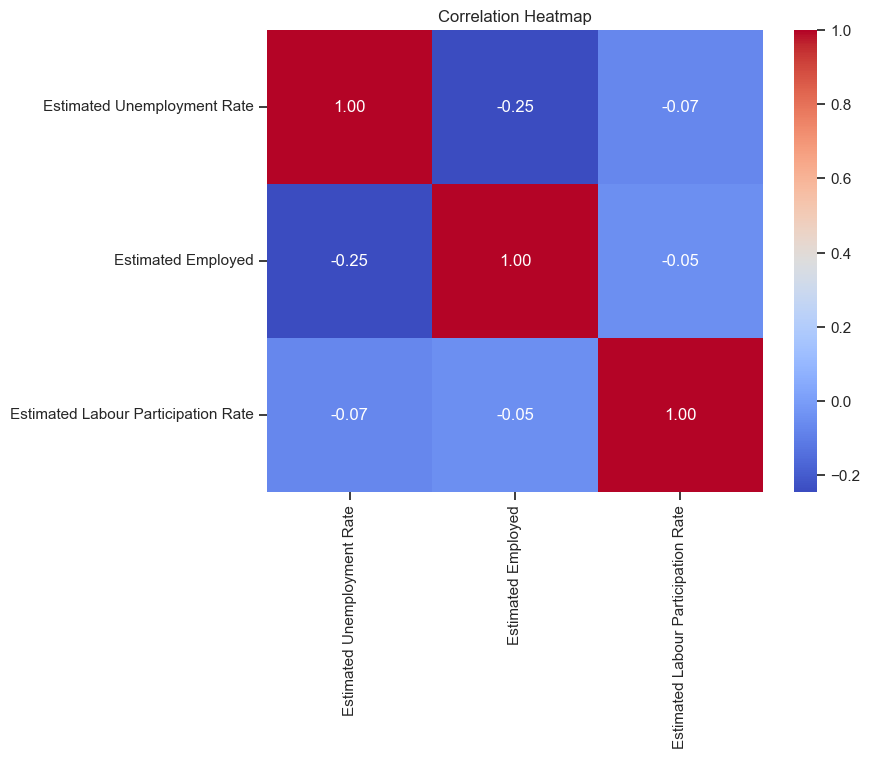

In [42]:
# Assuming df is your DataFrame with columns 'Estimated Unemployment Rate (%)', 'Estimated Employed', and 'Estimated Labor Participation Rate (%)'
corr_matrix = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Pie Chart for Distribution of states in region**

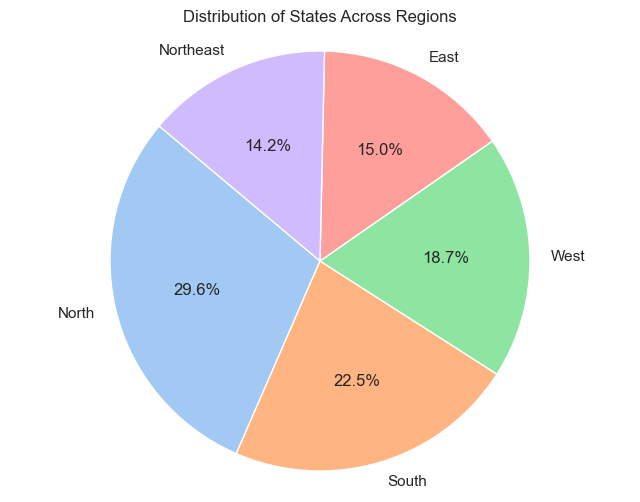

In [43]:
# Assuming df is your DataFrame with columns 'States' and 'Region'
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States Across Regions')
plt.axis('equal')
plt.show()

**Comparison of Employment Rate percentage according to regions using Violin plot **

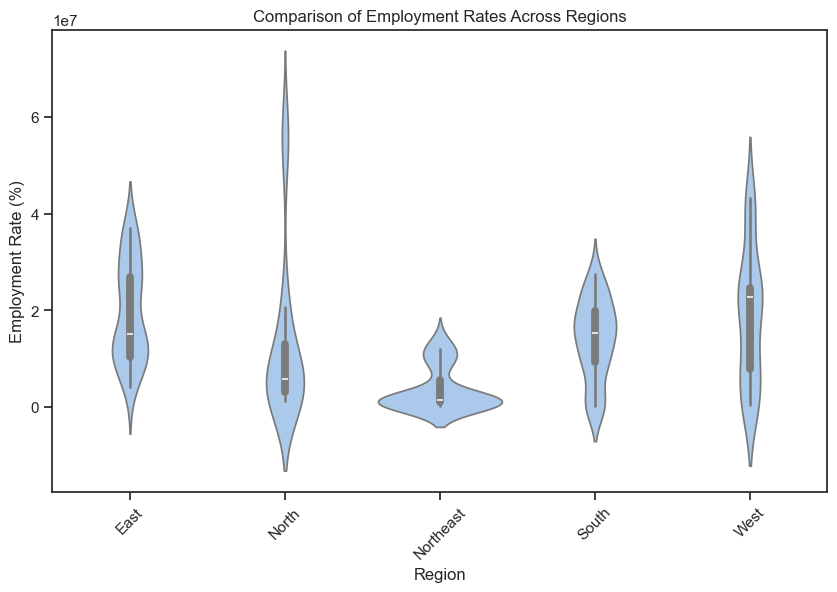

In [44]:
# Assuming df is your DataFrame with columns 'Region' and 'Estimated Employed'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Estimated Employed', data=df)
plt.xlabel('Region')
plt.ylabel('Employment Rate (%)')
plt.title('Comparison of Employment Rates Across Regions')
plt.xticks(rotation=45)
plt.show()

**Comparison of Labor Participation rates accross regions using Box plot**

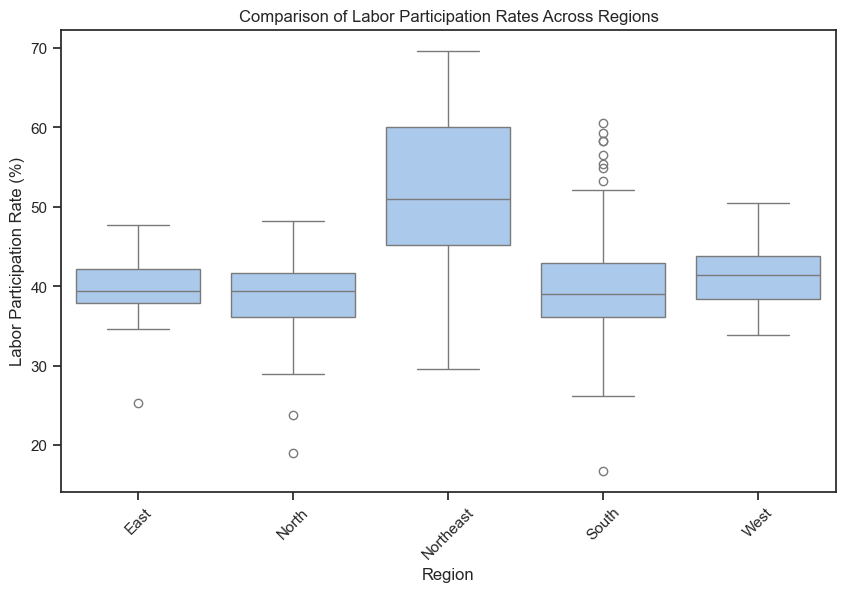

In [45]:
# Assuming df is your DataFrame with columns 'Region' and 'Estimated Labor Participation Rate (%)'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate', data=df)
plt.xlabel('Region')
plt.ylabel('Labor Participation Rate (%)')
plt.title('Comparison of Labor Participation Rates Across Regions')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


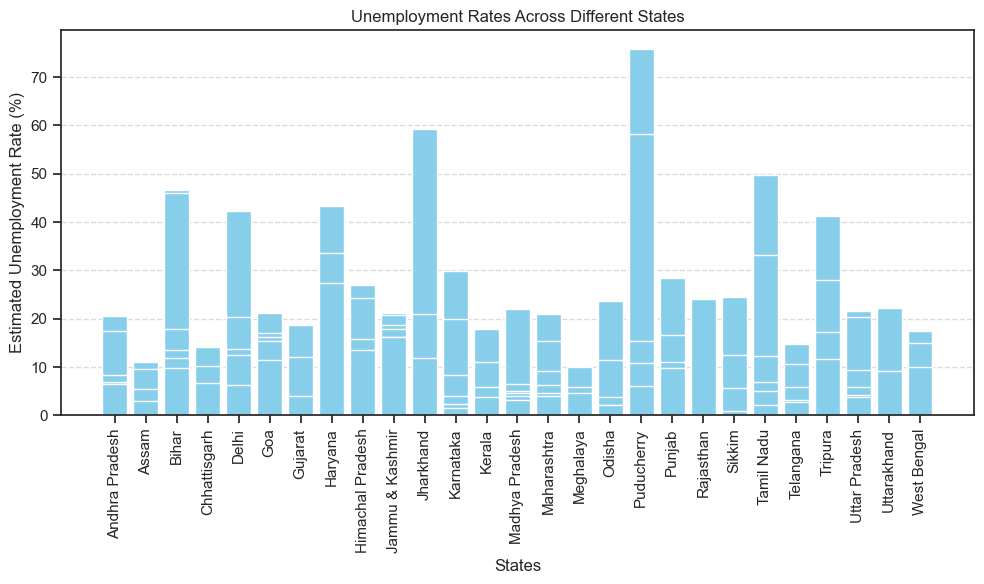

In [47]:
# Plotting bar chart for unemployment rates across different states
plt.figure(figsize=(10, 6))
plt.bar(df['States'], df['Estimated Unemployment Rate'], color='skyblue')
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rates Across Different States')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Average Unemployment Rates Across Different Regions**

C:\Users\ebrah\AppData\Local\Temp\ipykernel_10372\376649601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_unemployment = df.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()


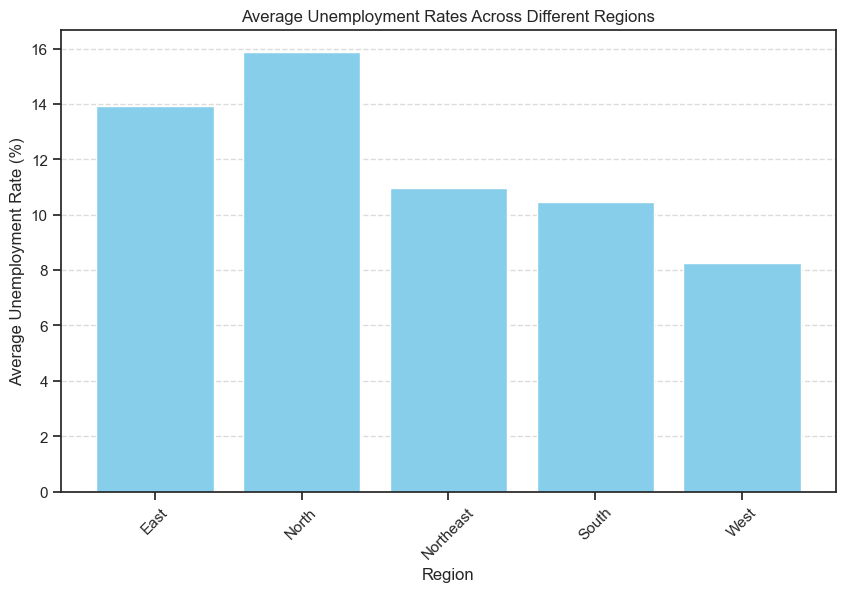

In [48]:
# Grouping data by region and calculating average unemployment rate for each region
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

# Plotting bar chart for average unemployment rates across different regions
plt.figure(figsize=(10, 6))
plt.bar(region_unemployment['Region'], region_unemployment['Estimated Unemployment Rate'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rates Across Different Regions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Visual presentation of details on Map of India**

In [49]:
# Load India map
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

for index, row in df.iterrows():
    popup_text = f"Region: {row['Region']}<br>Date: {row['Date']}<br>Frequency: {row['Frequency']}<br>Unemployment Rate: {row['Estimated Unemployment Rate']}%<br>Employed: {row['Estimated Employed']}<br>Labor Participation Rate: {row['Estimated Labour Participation Rate']}%"
    folium.Marker(location=[row['longitude'], row['latitude']], popup=popup_text).add_to(india_map)

# Display the map
india_map